In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import neural_network
import matplotlib.pyplot as plt 
from sklearn import neural_network
from sklearn import linear_model
import os
import itertools

In [2]:
def train_and_test(input_data, output_data):
    indexes = [i for i in range(len(input_data))]
    train_sample = np.random.choice(indexes, int(0.8 * len(input_data)), replace=False)
    test_sample = [i for i in indexes if i not in train_sample]
    train_inputs = [input_data[i] for i in train_sample]
    train_outputs = [output_data[i] for i in train_sample]
    test_inputs = [input_data[i] for i in test_sample]
    test_outputs = [output_data[i] for i in test_sample]
    return train_inputs, train_outputs, test_inputs, test_outputs

In [3]:
def plot_histogram_data(output_data, outputs_name, title):
    plt.hist(output_data, 10)
    plt.title('Histogram of ' + title)
    plt.xticks(np.arange(len(outputs_name)), outputs_name)
    plt.show()

In [4]:
def plot_classifier(loss_curve):
    plt.plot(loss_curve, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

In [5]:
from PIL import Image
from sklearn import neural_network


def process_image(path):
    img = Image.open(path)
    new_size = (64, 64)
    img = img.resize(new_size)
    img = np.asarray(img)
    processed = []
    for i in img:
        processed += list(i)
    return np.ravel(processed) / 255.0


def process_folder():
    inputs_data = []
    outputs_data = []
    i = 0
    for filename in os.listdir("./data/Normal"):
        print(i, end=' ')
        i += 1
        file_path = os.path.join("./data/Normal", filename)
        inputs_data.append(process_image(file_path))
        outputs_data.append(0)
    
    for filename in os.listdir("./data/Sepia"):
        print(i, end=' ')
        i += 1
        file_path = os.path.join("./data/Sepia", filename)
        inputs_data.append(process_image(file_path))
        outputs_data.append(1)

    inputs_data = np.array(inputs_data)
    outputs_data = np.array(outputs_data)


    permutation = np.random.permutation(len(inputs_data))

    inputs_data = inputs_data[permutation]
    outputs_data = outputs_data[permutation]
    
    return inputs_data, outputs_data


def train_by_tool(train_inputs, train_outputs, test_inputs):
    classifier = neural_network.MLPClassifier(hidden_layer_sizes=(12, 25, 12), max_iter=10000)
    classifier.fit(train_inputs, train_outputs)
    computed_outputs = classifier.predict(test_inputs)
    return computed_outputs


In [6]:
outputNames = ['normal', 'sepia']
inputData, outputData = process_folder()
trainInputs, trainOutputs, testInputs, testOutputs = train_and_test(inputData, outputData)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 

In [7]:
trainInputs = np.array(trainInputs)
trainOutputs = np.array(trainOutputs)
testInputs = np.array(testInputs)
testOutputs = np.array(testOutputs)

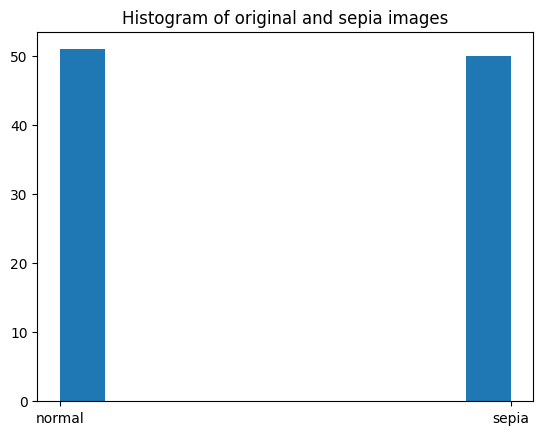

In [8]:
plot_histogram_data(trainOutputs, outputNames, 'original and sepia images')

In [9]:
computedOutputs = train_by_tool(trainInputs, trainOutputs, testInputs)
print(computedOutputs)
print(testOutputs)

[0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0]
[0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1]


In [10]:
from sklearn.metrics import confusion_matrix as cm

def evaluate(test_outputs, computed_labels, output_names):
    confusion_matrix_calculated = cm(test_outputs, computed_labels)
    acc = sum([confusion_matrix_calculated[i][i] for i in range(len(output_names))]) / len(test_outputs)
    prec = {}
    rec = {}
    for i in range(len(output_names)):
        prec[output_names[i]] = confusion_matrix_calculated[i][i] / sum([confusion_matrix_calculated[j][i]
                                                                         for j in range(len(output_names))])
        rec[output_names[i]] = confusion_matrix_calculated[i][i] / sum([confusion_matrix_calculated[i][j]
                                                                        for j in range(len(output_names))])
    print('Accuracy: ', acc)
    print('Precision: ', prec)  
    print('Recall: ', rec) 
    return confusion_matrix_calculated

confusion_matrix = evaluate(testOutputs, computedOutputs, outputNames)

Accuracy:  0.5769230769230769
Precision:  {'normal': 0.6666666666666666, 'sepia': 0.5}
Recall:  {'normal': 0.5333333333333333, 'sepia': 0.6363636363636364}


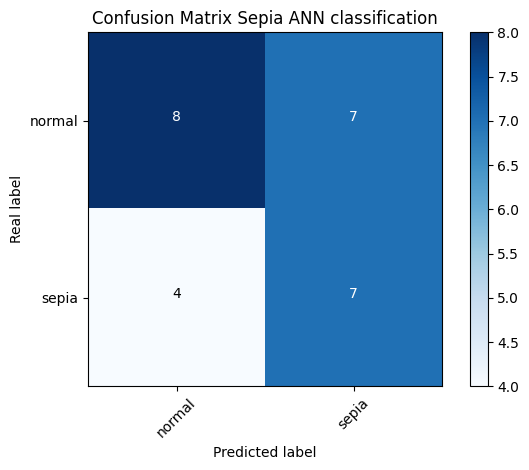

In [11]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                 horizontalalignment='center',
                 color='white' if cm[row, column] > thresh else 'black')
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


plot_confusion_matrix(confusion_matrix, outputNames, "Sepia ANN classification")

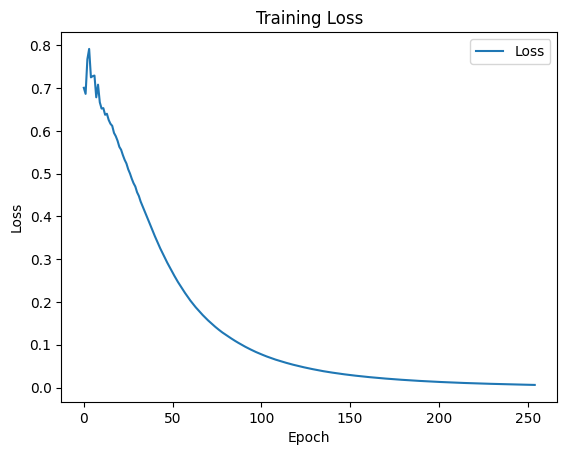

[0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0]
[0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1]
Accuracy:  0.5769230769230769
Precision:  {'normal': 0.6666666666666666, 'sepia': 0.5}
Recall:  {'normal': 0.5333333333333333, 'sepia': 0.6363636363636364}


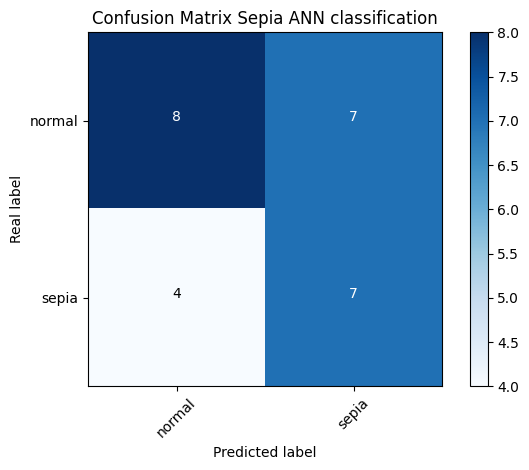

In [12]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(12, 25, 12), activation='relu', max_iter=7000, solver='adam')
classifier.fit(trainInputs, trainOutputs)

computed_outputs = classifier.predict(testInputs)
plot_classifier(classifier.loss_curve_)

print(computedOutputs)
print(testOutputs)

confusion_matrix = evaluate(testOutputs, computedOutputs, outputNames)
plot_confusion_matrix(confusion_matrix, outputNames, "Sepia ANN classification")

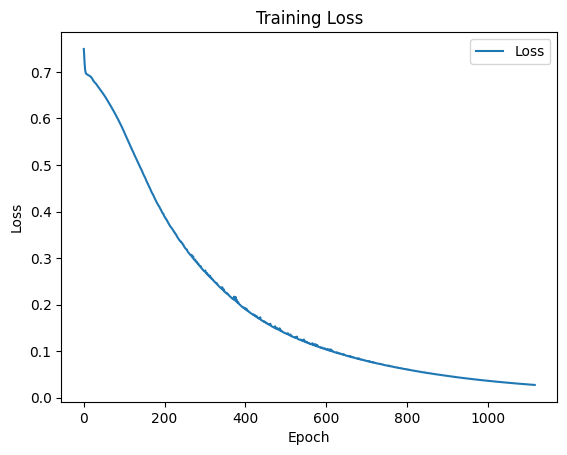

[0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0]
[0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1]
Accuracy:  0.5769230769230769
Precision:  {'normal': 0.6666666666666666, 'sepia': 0.5}
Recall:  {'normal': 0.5333333333333333, 'sepia': 0.6363636363636364}


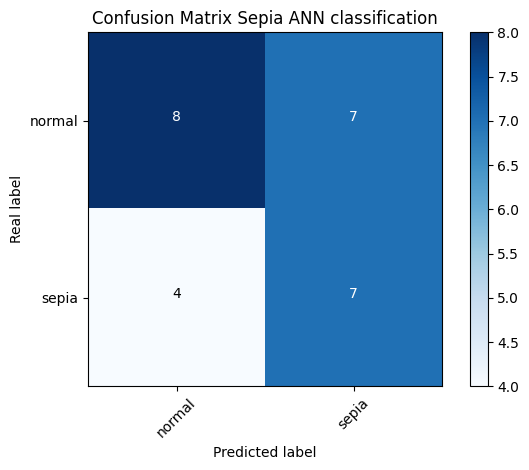

In [13]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(12, 25, 12), activation='relu', max_iter=7000, solver='sgd')
classifier.fit(trainInputs, trainOutputs)

computed_outputs = classifier.predict(testInputs)
plot_classifier(classifier.loss_curve_)

print(computedOutputs)
print(testOutputs)

confusion_matrix = evaluate(testOutputs, computedOutputs, outputNames)
plot_confusion_matrix(confusion_matrix, outputNames, "Sepia ANN classification")

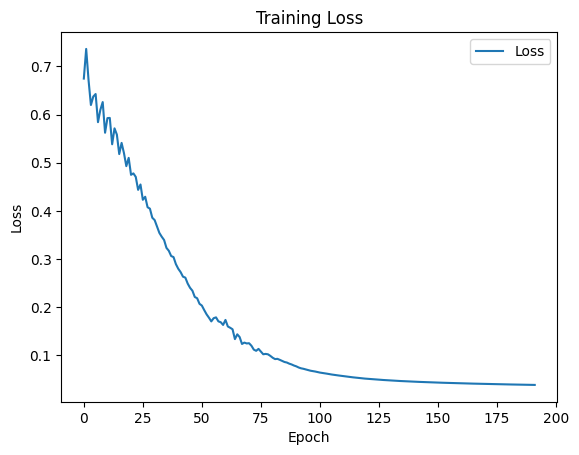

[0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0]
[0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1]
Accuracy:  0.5769230769230769
Precision:  {'normal': 0.6666666666666666, 'sepia': 0.5}
Recall:  {'normal': 0.5333333333333333, 'sepia': 0.6363636363636364}


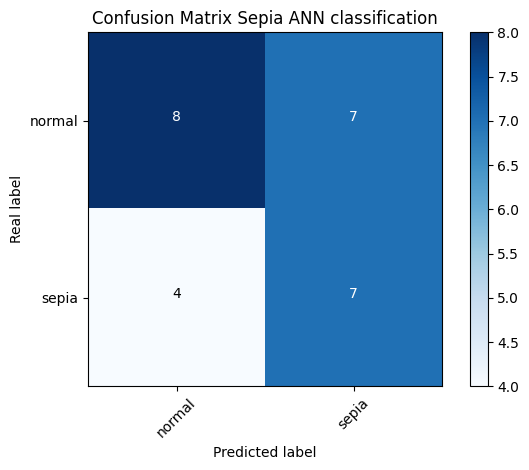

In [14]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(12, 25, 12), activation='tanh', max_iter=7000, solver='adam')
classifier.fit(trainInputs, trainOutputs)

computed_outputs = classifier.predict(testInputs)
plot_classifier(classifier.loss_curve_)

print(computedOutputs)
print(testOutputs)

confusion_matrix = evaluate(testOutputs, computedOutputs, outputNames)
plot_confusion_matrix(confusion_matrix, outputNames, "Sepia ANN classification")